In [41]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn import cross_validation
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)

import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

import sklearn.linear_model

In [42]:
df = pd.read_csv("yellow_tripdata_2015-01-1p.csv")

In [43]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2015-01-29 09:00:36,2015-01-29 09:20:41,1,1.90,-74.005905,40.735645,1,N,-73.982353,40.749092,1,13.5,0.0,0.5,1.70,0.00,0.3,16.00
1,1,2015-01-16 21:59:15,2015-01-16 22:09:05,1,1.30,-73.988808,40.721855,1,N,-73.990845,40.734997,1,8.0,0.5,0.5,1.85,0.00,0.3,11.15
2,2,2015-01-09 19:29:35,2015-01-09 19:35:18,1,0.35,-73.980316,40.742496,1,N,-73.985909,40.745132,2,5.0,1.0,0.5,0.00,0.00,0.3,6.80
3,1,2015-01-28 14:28:17,2015-01-28 14:48:55,2,7.90,-73.873108,40.774086,1,N,-73.954384,40.781269,1,24.0,0.0,0.5,0.00,5.33,0.3,30.13
4,2,2015-01-22 07:08:12,2015-01-22 07:14:48,1,1.29,-73.961906,40.763901,1,N,-73.975761,40.753979,1,6.5,0.0,0.5,1.46,0.00,0.3,8.76


In [44]:
len(df)

127490

In [45]:
print df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object


In [46]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000
mean,1.520535,1.681567,2.782500,-72.543729,39.962788,1.036921,-72.590987,39.989797,1.385293,11.900871,0.308217,0.497776,1.561781,0.243486,0.283276,14.811335
std,0.499580,1.340551,3.403465,10.188356,5.612579,0.668754,10.020768,5.520446,0.498167,10.110382,0.361912,0.035273,3.353501,1.210873,0.068829,12.514612
min,1.000000,0.000000,0.000000,-75.254013,0.000000,1.000000,-75.254036,0.000000,1.000000,-75.000000,-1.000000,-0.500000,-1.000000,0.000000,0.000000,-75.300000
25%,1.000000,1.000000,1.000000,-73.991631,40.735592,1.000000,-73.991173,40.734398,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.160000
50%,2.000000,1.000000,1.675000,-73.981575,40.753128,1.000000,-73.979752,40.753632,1.000000,9.000000,0.000000,0.500000,1.000000,0.000000,0.300000,11.160000
75%,2.000000,2.000000,3.000000,-73.966629,40.767555,1.000000,-73.962555,40.768742,2.000000,13.500000,0.500000,0.500000,2.080000,0.000000,0.300000,16.300000
max,2.000000,6.000000,99.900000,0.000000,41.570671,99.000000,0.000000,41.745903,4.000000,551.110000,7.000000,0.500000,700.000000,29.750000,0.300000,732.300000


In [47]:
def get_dt(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

df['tpep_pickup_datetime'] = df.apply(lambda x: get_dt(x[1]), axis=1)
df['tpep_dropoff_datetime'] = df.apply(lambda x: get_dt(x[2]), axis=1)

df['tpep_pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
#df['tpep_dropoff_dayofweek'] = df['tpep_dropoff_datetime'].dt.dayofweek

#df['tpep_pickup_time'] = df['tpep_pickup_time'].astype("int")
df['tpep_pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

#df['tpep_pickup_minuteofday'] = df['tpep_pickup_time'].apply(lambda x: x.hour) * 60 + df['tpep_pickup_time'].apply(lambda x: x.minute)
#df['tpep_dropoff_time'] = df['tpep_dropoff_datetime'].dt.time

In [48]:
df = df.drop(['store_and_fwd_flag', 
              'tpep_pickup_datetime', 
              'tpep_dropoff_datetime', 
              'fare_amount', 
              'extra', 
              'mta_tax', 
              'tip_amount', 
              'tolls_amount', 
              'improvement_surcharge'], axis=1)

In [49]:
df.dtypes

VendorID                   int64
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
total_amount             float64
tpep_pickup_dayofweek      int64
tpep_pickup_hour           int64
dtype: object

In [50]:
df.head(10)

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,total_amount,tpep_pickup_dayofweek,tpep_pickup_hour
0,1,1,1.90,-74.005905,40.735645,1,-73.982353,40.749092,1,16.00,3,9
1,1,1,1.30,-73.988808,40.721855,1,-73.990845,40.734997,1,11.15,4,21
2,2,1,0.35,-73.980316,40.742496,1,-73.985909,40.745132,2,6.80,4,19
3,1,2,7.90,-73.873108,40.774086,1,-73.954384,40.781269,1,30.13,2,14
4,2,1,1.29,-73.961906,40.763901,1,-73.975761,40.753979,1,8.76,3,7
5,1,1,1.30,-73.959190,40.760860,1,-73.961464,40.770172,1,14.75,1,13
6,1,1,5.60,-73.870850,40.773743,1,-73.822807,40.727856,1,21.36,1,9
7,2,1,0.81,-73.952324,40.772816,1,-73.962959,40.775036,1,6.80,3,14
8,2,1,2.58,-73.998596,40.760700,1,-73.962769,40.758251,2,14.80,5,12
9,2,5,0.54,-73.963844,40.766808,1,-73.967735,40.762783,1,6.20,5,13


In [51]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,total_amount,tpep_pickup_dayofweek,tpep_pickup_hour
count,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000
mean,1.520535,1.681567,2.782500,-72.543729,39.962788,1.036921,-72.590987,39.989797,1.385293,14.811335,3.256224,13.533273
std,0.499580,1.340551,3.403465,10.188356,5.612579,0.668754,10.020768,5.520446,0.498167,12.514612,1.862005,6.423312
min,1.000000,0.000000,0.000000,-75.254013,0.000000,1.000000,-75.254036,0.000000,1.000000,-75.300000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,-73.991631,40.735592,1.000000,-73.991173,40.734398,1.000000,8.160000,2.000000,9.000000
50%,2.000000,1.000000,1.675000,-73.981575,40.753128,1.000000,-73.979752,40.753632,1.000000,11.160000,3.000000,14.000000
75%,2.000000,2.000000,3.000000,-73.966629,40.767555,1.000000,-73.962555,40.768742,2.000000,16.300000,5.000000,19.000000
max,2.000000,6.000000,99.900000,0.000000,41.570671,99.000000,0.000000,41.745903,4.000000,732.300000,6.000000,23.000000


In [52]:
df = df[df['pickup_longitude']!= 0]
df = df[df['passenger_count']!= 0]
df = df[df['trip_distance']!= 0]
df = df[df['dropoff_longitude']!= 0]
df = df[df['total_amount'] > 0]
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,total_amount,tpep_pickup_dayofweek,tpep_pickup_hour
count,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000
mean,1.527309,1.688911,2.803509,-73.974713,40.751052,1.030456,-73.974355,40.751856,1.382014,14.780277,3.256286,13.536509
std,0.499256,1.346670,3.410712,0.035655,0.027080,0.658208,0.033855,0.036006,0.493981,12.212212,1.863083,6.420929
min,1.000000,1.000000,0.010000,-74.412560,40.464748,1.000000,-74.445335,34.266254,1.000000,0.300000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,-73.991814,40.737228,1.000000,-73.991348,40.736092,1.000000,8.300000,2.000000,9.000000
50%,2.000000,1.000000,1.700000,-73.981941,40.754028,1.000000,-73.980232,40.754337,1.000000,11.160000,3.000000,14.000000
75%,2.000000,2.000000,3.000000,-73.967972,40.767967,1.000000,-73.964104,40.769176,2.000000,16.300000,5.000000,19.000000
max,2.000000,6.000000,99.900000,-73.283127,41.256779,99.000000,-72.241844,41.745903,4.000000,732.300000,6.000000,23.000000


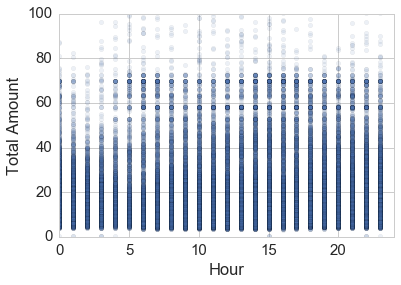

In [53]:
# visualize the relationship between the features and the response using scatterplots
df.plot(kind ='scatter', x='tpep_pickup_hour', y='total_amount', alpha=0.1)
plt.xlabel('Hour')
plt.ylabel('Total Amount')
plt.axis([0, 24, 0, 100])
plt.grid(True)
plt.show()

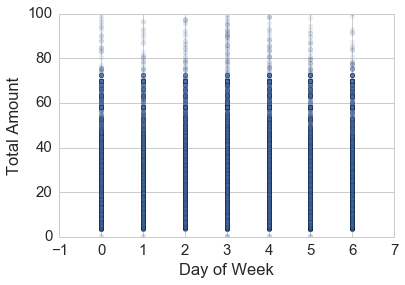

In [54]:
# visualize the relationship between the features and the response using scatterplots
df.plot(kind ='scatter', x='tpep_pickup_dayofweek', y='total_amount', alpha=0.1)
plt.xlabel('Day of Week')
plt.ylabel('Total Amount')
plt.axis([-1, 7, 0, 100])
plt.grid(True)
plt.show()

(0, 250)

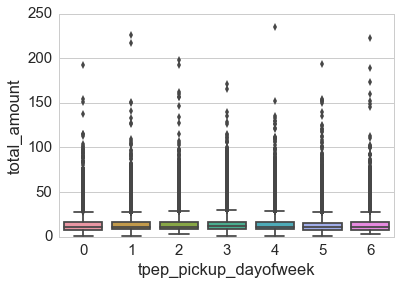

In [55]:
sns.boxplot(x='tpep_pickup_dayofweek', y='total_amount', data=df)
plt.ylim(0, 250)

(0, 250)

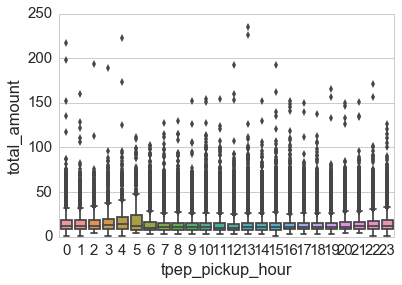

In [56]:
sns.boxplot(x='tpep_pickup_hour', y='total_amount', data=df)
plt.ylim(0, 250)

In [58]:
df = df.join(pd.get_dummies(df['tpep_pickup_hour'], prefix='hour'))
#df = pd.get_dummies(df).astype(np.int8)
df.head()

ValueError: columns overlap but no suffix specified: Index([u'hour_0', u'hour_1', u'hour_2', u'hour_3', u'hour_4', u'hour_5',
       u'hour_6', u'hour_7', u'hour_8', u'hour_9', u'hour_10', u'hour_11',
       u'hour_12', u'hour_13', u'hour_14', u'hour_15', u'hour_16', u'hour_17',
       u'hour_18', u'hour_19', u'hour_20', u'hour_21', u'hour_22', u'hour_23'],
      dtype='object')

In [39]:
df.dtypes

VendorID                 int8
passenger_count          int8
trip_distance            int8
pickup_longitude         int8
pickup_latitude          int8
RateCodeID               int8
dropoff_longitude        int8
dropoff_latitude         int8
payment_type             int8
total_amount             int8
tpep_pickup_dayofweek    int8
tpep_pickup_hour         int8
hour_0                   int8
hour_1                   int8
hour_2                   int8
hour_3                   int8
hour_4                   int8
hour_5                   int8
hour_6                   int8
hour_7                   int8
hour_8                   int8
hour_9                   int8
hour_10                  int8
hour_11                  int8
hour_12                  int8
hour_13                  int8
hour_14                  int8
hour_15                  int8
hour_16                  int8
hour_17                  int8
hour_18                  int8
hour_19                  int8
hour_20                  int8
hour_21   

In [18]:
# Set target variable name
target = 'total_amount'

# Set X and y
X = df.drop([target], axis=1)
y = df[target]


# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)


# check size of training set
print X_train.shape, y_train.shape

# check size of test set
print X_test.shape, y_test.shape

(74546, 35) (74546,)
(49698, 35) (49698,)


In [ ]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    #plot hist of errors
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    # keep the model
    return algo

X = X_train
y = y_train

lm = linear_model.LinearRegression(fit_intercept=False)
lm = get_linear_model_metrics(X_train, y_train, lm)

In [ ]:
X = bikeshare[['temp', 'hum']].join(pd.get_dummies(bikeshare['weathersit'], prefix='weathersit'))